In [85]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

In [86]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%b-%y')

In [87]:
time = pd.read_csv("USCarrier_Traffic_20210425082303.csv",
                   parse_dates=['Period'], index_col='Period',
                   date_parser=dateparse)
time.head()

,Total
Period,
2000-01-01,49045412
2000-02-01,49306303
2000-03-01,60443541
2000-04-01,58286680
2000-05-01,60533783


In [88]:
time1 = time['Total']
time1.head()

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
Name: Total, dtype: int64

In [89]:
time1.tail()

Period
2018-10-01    84870973
2018-11-01    79928178
2018-12-01    83057947
2019-01-01    77339889
2019-02-01    71123686
Name: Total, dtype: int64

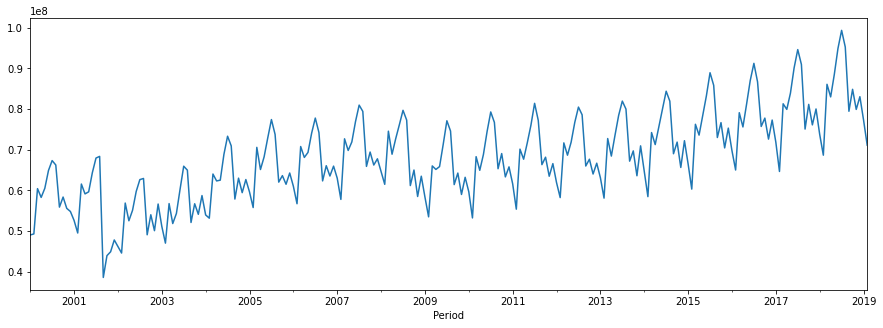

In [90]:
time1.plot(kind="line",figsize=(15,5))
plt.show()

In [91]:
time.shape

(230, 1)

In [92]:
#15 years * 12 months = 180 data points
#lets take 15 years data as TRAIN data and 4 years data as TEST data

In [93]:
train=time1[0:180] 
test=time1[180:]

In [94]:
train.head()

Period
2000-01-01    49045412
2000-02-01    49306303
2000-03-01    60443541
2000-04-01    58286680
2000-05-01    60533783
Name: Total, dtype: int64

In [95]:
#test.head()

In [96]:
#train.tail()

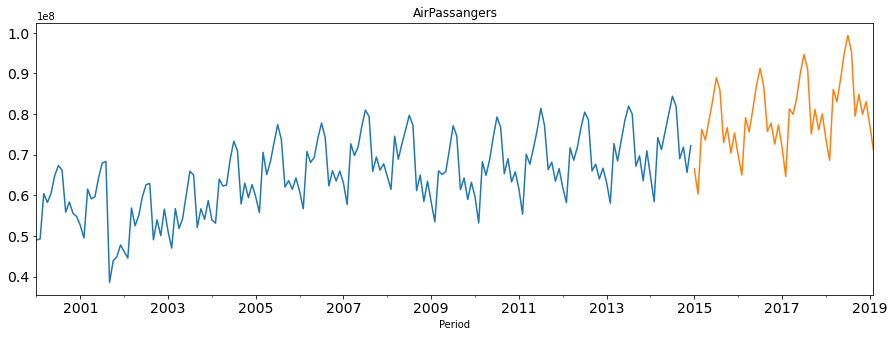

In [97]:
train.plot(figsize=(15,5), title= 'AirPassangers', fontsize=14)
test.plot(figsize=(15,5), title= 'AirPassangers', fontsize=14)
plt.show()

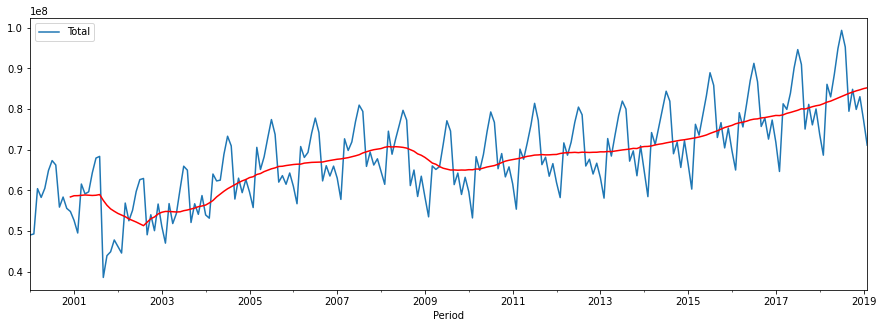

In [98]:
#moving_avg = pd.rolling_mean(time1,12)

moving_avg =time1.rolling(12).mean()
time.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

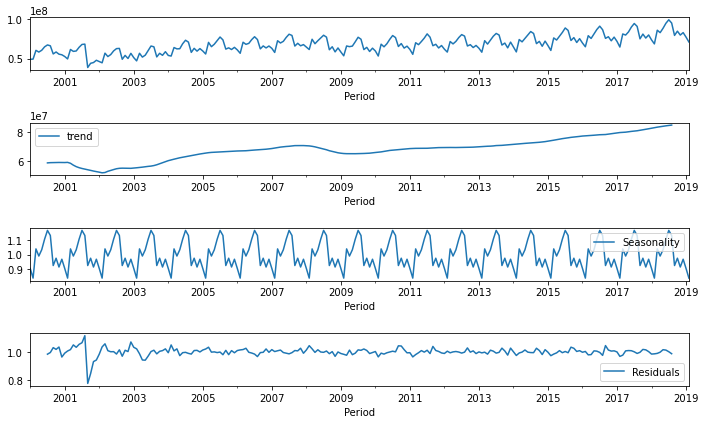

In [99]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='multiplicative', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

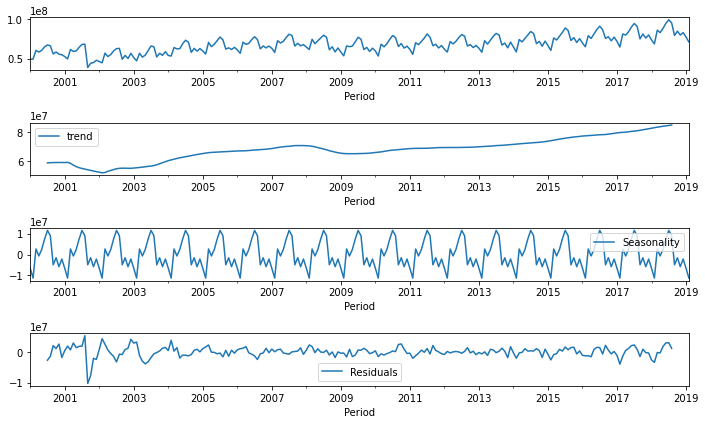

In [100]:
import statsmodels.tsa.seasonal as sts
decomposition = sts.seasonal_decompose(time1,model='additive', freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
time1.plot(kind="line",figsize=(10,6),label='Original')
plt.subplot(412)
trend.plot(kind="line",figsize=(10,6),label='trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.plot(kind="line",figsize=(10,6),label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.plot(kind="line",figsize=(10,6),label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [101]:
#trend

In [102]:
#seasonal

In [103]:
#residual

In [104]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [105]:
train = train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(12)
ses.summary()

Dep. Variable:,Total,No. Observations:,180
Model:,SimpleExpSmoothing,SSE,7556548019841386.000
Optimized:,True,AIC,5650.282
Trend:,None,BIC,5656.668
Seasonal:,None,AICC,5650.511
Seasonal Periods:,None,Date:,"Sun, 25 Apr 2021"
Box-Cox:,False,Time:,19:12:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7072093,alpha,True
initial_level,4.9045e+07,l.0,True


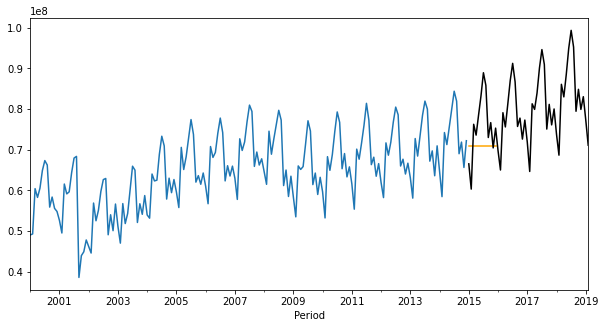

In [106]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

In [107]:
hes = ExponentialSmoothing(train, trend='add').fit()
hes.summary()

Dep. Variable:,Total,No. Observations:,180
Model:,ExponentialSmoothing,SSE,7559181185673684.000
Optimized:,True,AIC,5654.345
Trend:,Additive,BIC,5667.117
Seasonal:,None,AICC,5654.830
Seasonal Periods:,None,Date:,"Sun, 25 Apr 2021"
Box-Cox:,False,Time:,19:12:54
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7121429,alpha,True
smoothing_trend,0.0001,beta,True


In [108]:
hes1 = hes.forecast(36)

<AxesSubplot:xlabel='Period'>

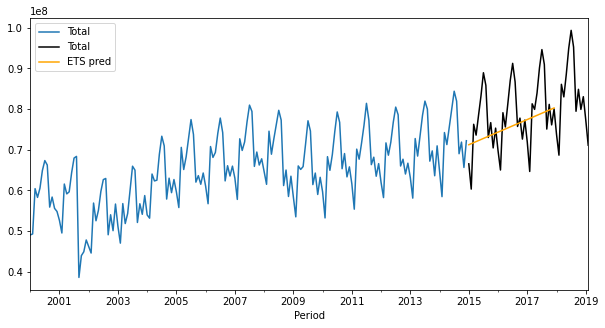

In [109]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [110]:
hwes = ExponentialSmoothing(train , seasonal_periods=12 ,trend='add', seasonal="Multiplicative").fit()
hwes.summary()

Dep. Variable:,Total,No. Observations:,180
Model:,ExponentialSmoothing,SSE,72632425204182617342083072.000
Optimized:,True,AIC,9815.809
Trend:,Additive,BIC,9866.897
Seasonal:,Multiplicative,AICC,9820.058
Seasonal Periods:,12,Date:,"Sun, 25 Apr 2021"
Box-Cox:,False,Time:,19:13:03
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5353571,alpha,True
smoothing_trend,0.0254932,beta,True


In [111]:
hwes1 = hwes.forecast(24)
print(hwes1)

2015-01-01   -1.514959e+09
2015-02-01   -2.372185e+08
2015-03-01   -6.026489e+08
2015-04-01    9.809536e+07
2015-05-01    7.771616e+08
2015-06-01    9.386308e+08
2015-07-01   -1.010816e+09
2015-08-01   -1.563860e+09
2015-09-01    5.457027e+07
2015-10-01    1.830201e+08
2015-11-01    6.683259e+07
2015-12-01   -1.161891e+09
2016-01-01   -3.380825e+09
2016-02-01   -5.021883e+08
2016-03-01   -1.218477e+09
2016-04-01    1.904697e+08
2016-05-01    1.455748e+09
2016-06-01    1.702615e+09
2016-07-01   -1.781295e+09
2016-08-01   -2.684693e+09
2016-09-01    9.147699e+07
2016-10-01    3.001955e+08
2016-11-01    1.074537e+08
2016-12-01   -1.834048e+09
Freq: MS, dtype: float64


<AxesSubplot:xlabel='Period'>

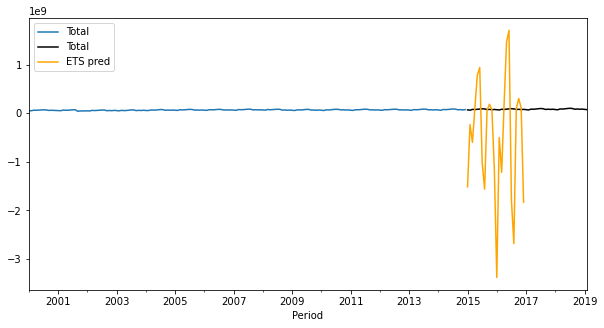

In [112]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [113]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

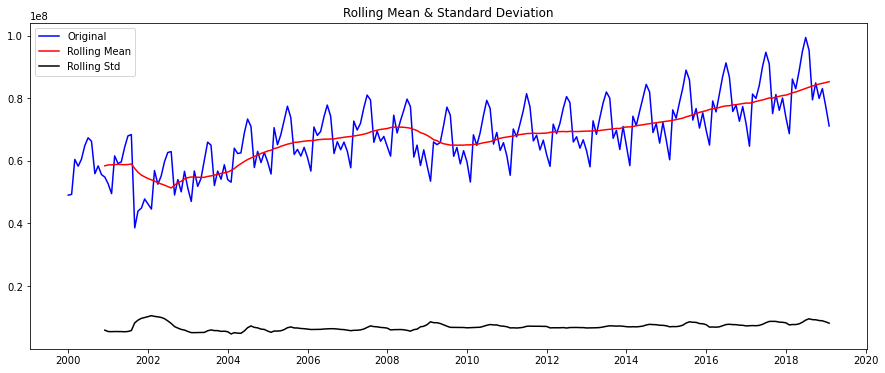

Results of Dickey-Fuller Test:
Test Statistic                  -0.124016
p-value                          0.946993
#Lags Used                      13.000000
Number of Observations Used    216.000000
Critical Value (1%)             -3.460992
Critical Value (5%)             -2.875016
Critical Value (10%)            -2.573952
dtype: float64


In [114]:
test_stationarity(time1)

In [115]:
#series is not stationary as mean is increasing even though the std.
#pvalue> 0.05 hence H0 accepted that the series is nonstationary

In [116]:
diff1=train.diff()
diff1=diff1.dropna()

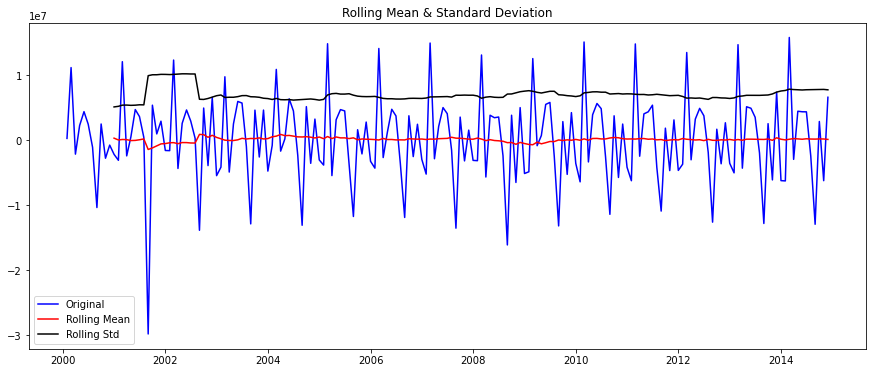

Results of Dickey-Fuller Test:
Test Statistic                  -3.434626
p-value                          0.009834
#Lags Used                      12.000000
Number of Observations Used    166.000000
Critical Value (1%)             -3.470370
Critical Value (5%)             -2.879114
Critical Value (10%)            -2.576139
dtype: float64


In [117]:
test_stationarity(diff1)

In [118]:
diff2=diff1.diff()
diff2=diff2.dropna()

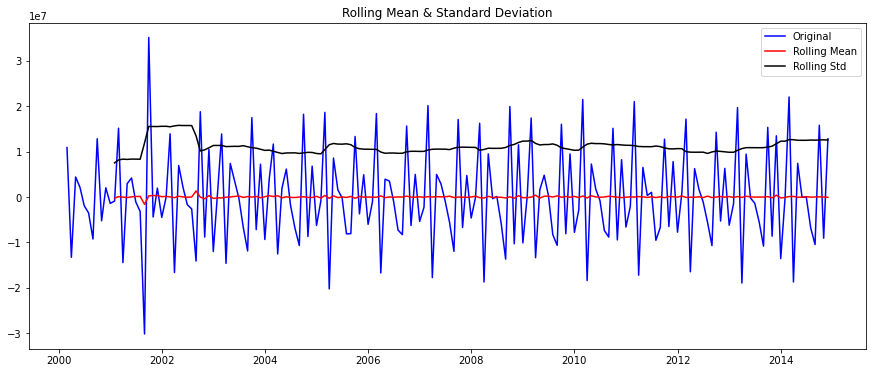

Results of Dickey-Fuller Test:
Test Statistic                -1.439089e+01
p-value                        8.828621e-27
#Lags Used                     1.100000e+01
Number of Observations Used    1.660000e+02
Critical Value (1%)           -3.470370e+00
Critical Value (5%)           -2.879114e+00
Critical Value (10%)          -2.576139e+00
dtype: float64


In [119]:
test_stationarity(diff2)

In [120]:
#series is stationary as mean and std is constatnt.
#pvalue< 0.05 hence H0 rejected that the series is stationary

In [121]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

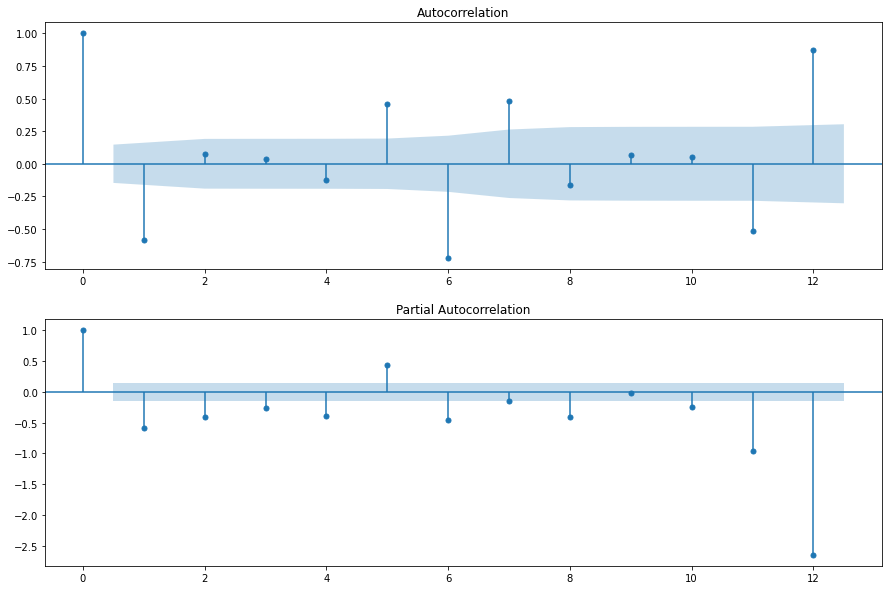

In [122]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff2, ax=pyplot.gca(),lags=12)
pyplot.subplot(212)
plot_pacf(diff2, ax=pyplot.gca(),lags=12)
pyplot.show()

In [123]:
!pip install pmdarima

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,2,0)[12]             : AIC=5282.077, Time=0.02 sec
 ARIMA(1,2,0)(1,2,0)[12]             : AIC=5196.581, Time=0.15 sec
 ARIMA(0,2,1)(0,2,1)[12]             : AIC=5088.259, Time=0.17 sec
 ARIMA(0,2,1)(0,2,0)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(0,2,1)(1,2,1)[12]             : AIC=5089.249, Time=0.40 sec
 ARIMA(0,2,1)(0,2,2)[12]             : AIC=5089.144, Time=0.52 sec
 ARIMA(0,2,1)(1,2,0)[12]             : AIC=5124.816, Time=0.29 sec
 ARIMA(0,2,1)(1,2,2)[12]             : AIC=5090.252, Time=1.13 sec
 ARIMA(0,2,0)(0,2,1)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(1,2,1)(0,2,1)[12]             : AIC=5085.769, Time=0.22 sec
 ARIMA(1,2,1)(0,2,0)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,2,1)(1,2,1)[12]             : AIC=5086.792, Time=0.26 sec
 ARIMA(1,2,1)(0,2,2)[12]             : AIC=5086.681, Time=0.47 sec
 ARIMA(1,2,1)(1,2,0)[12]             : AIC=5121.855, Time=0.31 sec
 ARIMA(1,2,1)(1,2,2)[12]          

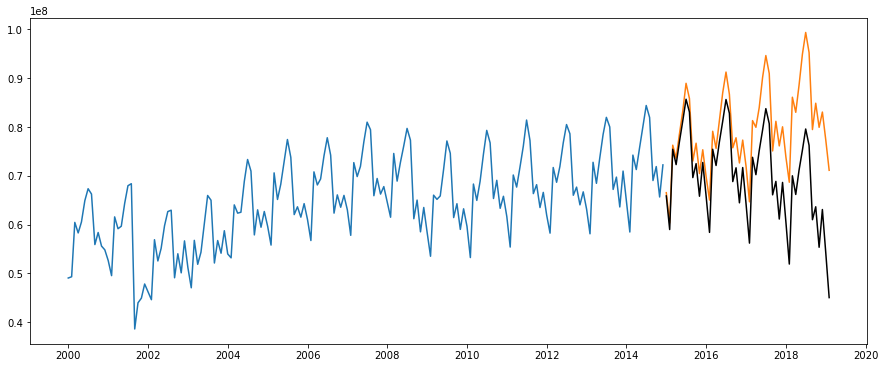

In [124]:
from pmdarima import auto_arima
model = auto_arima(train, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, start_Q=0, max_P=2, max_Q=2, seasonal=True,
                           d=2, D=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [125]:
#print(forecast)

In [126]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  180
Model:             SARIMAX(2, 2, 2)x(0, 2, [1], 12)   Log Likelihood               -2516.956
Date:                              Sun, 25 Apr 2021   AIC                           5045.911
Time:                                      19:14:06   BIC                           5064.133
Sample:                                           0   HQIC                          5053.313
                                              - 180                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2194      0.157     -7.753      0.000      -1.528      -0.911
ar.L2         -0.27

In [127]:
import warnings
warnings.filterwarnings("ignore")

In [128]:
from statsmodels.tsa.arima_model import ARIMA

In [129]:
model = ARIMA(train, order=(2,2,2))
model_fit=model.fit(disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Total   No. Observations:                  178
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -3040.427
Method:                       css-mle   S.D. of innovations        6227999.598
Date:                Sun, 25 Apr 2021   AIC                           6092.855
Time:                        19:14:09   BIC                           6111.945
Sample:                    03-01-2000   HQIC                          6100.596
                         - 12-01-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -940.0780   6971.194     -0.135      0.893   -1.46e+04    1.27e+04
ar.L1.D2.Total    -1.0858      0.076    -14.243      0.000      -1.235      -0.936
ar.L2.D2.Total    -0.3615      0.071

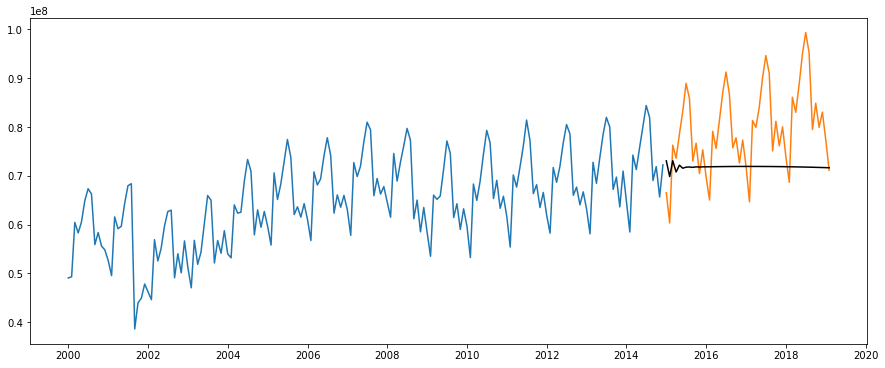

In [132]:
forecast = model_fit.forecast(steps=50)[0]

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [134]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

9329501.22673581


In [135]:
import statsmodels.api as sm

In [136]:
diffs1=train.diff(12)
diffs1=diffs1.dropna()

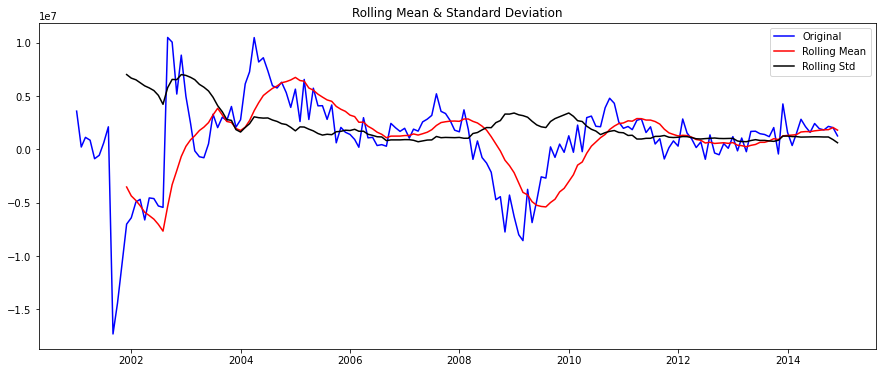

Results of Dickey-Fuller Test:
Test Statistic                  -2.944643
p-value                          0.040398
#Lags Used                      14.000000
Number of Observations Used    153.000000
Critical Value (1%)             -3.473830
Critical Value (5%)             -2.880623
Critical Value (10%)            -2.576945
dtype: float64


In [137]:
test_stationarity(diffs1)

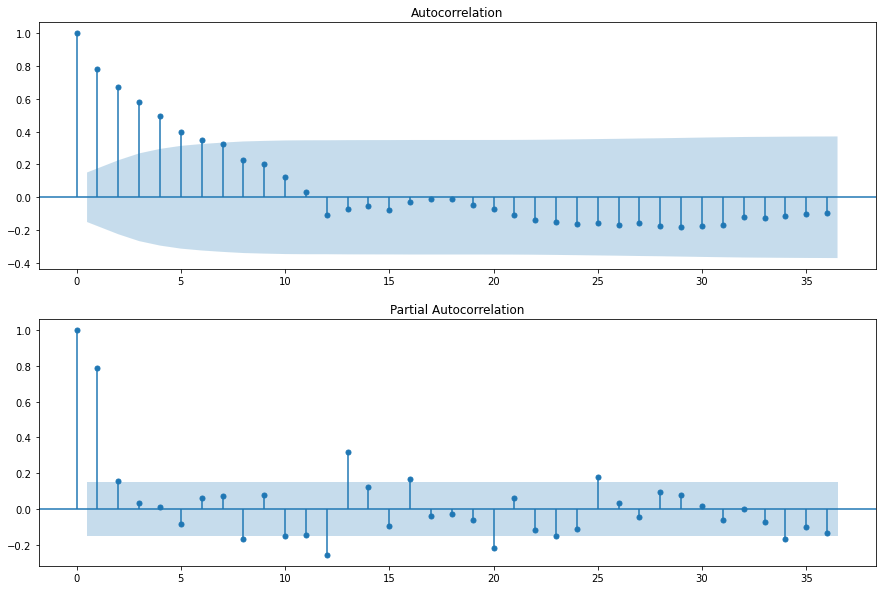

In [138]:
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diffs1, ax=pyplot.gca(),lags=36)
pyplot.subplot(212)
plot_pacf(diffs1, ax=pyplot.gca(),lags=36)
pyplot.show()

In [139]:
train.shape

(180,)

In [140]:
model = sm.tsa.SARIMAX(train, order=(2,2,2), seasonal_order=(1,1,3,12))

In [141]:
model_fit=model.fit(disp=True)
print(model_fit.summary())


                                         SARIMAX Results                                          
Dep. Variable:                                      Total   No. Observations:                  180
Model:             SARIMAX(2, 2, 2)x(1, 1, [1, 2, 3], 12)   Log Likelihood               -2677.273
Date:                                    Sun, 25 Apr 2021   AIC                           5372.545
Time:                                            19:14:36   BIC                           5400.553
Sample:                                        01-01-2000   HQIC                          5383.914
                                             - 12-01-2014                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1293      1.193     -0.947      0

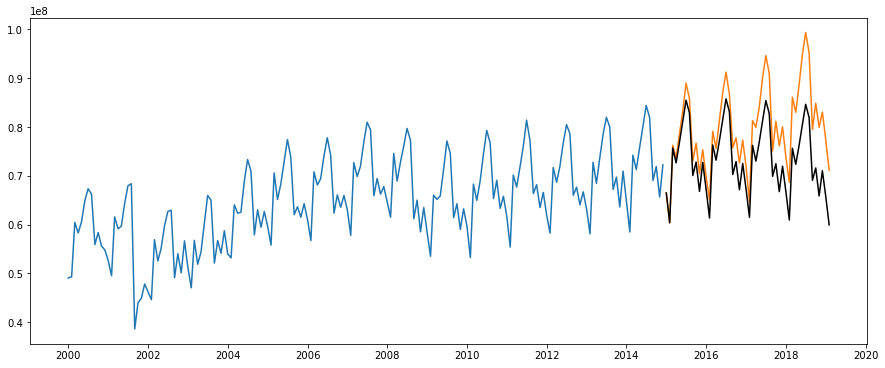

In [144]:
forecast = model_fit.forecast(steps=50)
#print(forecast)

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [145]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

6475275.568383451
